In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


C:\Users\RUDRANARAYAN\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


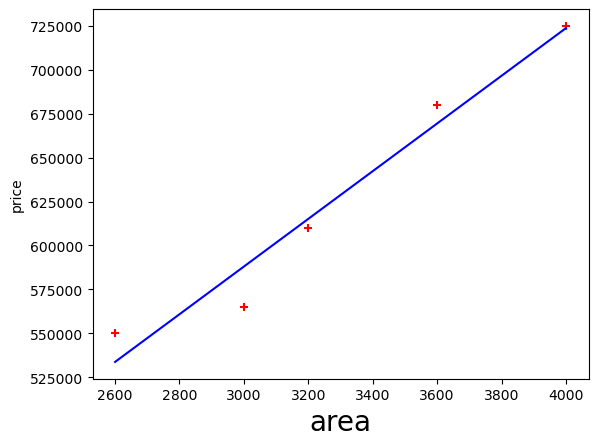

In [47]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price')
df.count()

plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[['area']]), color="blue")


In [49]:
# Creating a object for linear reg
reg = linear_model.LinearRegression()
reg.fit(df[['area']].values,df.price)


LinearRegression()

In [51]:
reg.predict([[3300]])

array([628715.75342466])

In [53]:
reg.coef_

array([135.78767123])

In [55]:
reg.intercept_

180616.43835616432

In [57]:
# Y = m * X + b (m is coefficient and b is intercept)
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [59]:
df1 = pd.read_csv("areas.csv")
# df1
df1.head(3)

,area
0,1000
1,1500
2,2300


In [74]:
p = reg.predict(df1)

C:\Users\RUDRANARAYAN\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [78]:
df1['prices'] = p
# df1
df1.to_csv('prediction.csv',index=False)

In [66]:
# MultiVariative Linear Regresssion - Linear Reg with multiple variables -->-->--->

In [80]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
import math

df = pd.read_csv("homeprices2.csv")
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [82]:
med_bedrooms = math.floor( df.bedrooms.median())
print(med_bedrooms)

4


In [84]:
df.bedrooms = df.bedrooms.fillna(med_bedrooms)

In [13]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [31]:
# Create Linear Reg Object
reg2 = linear_model.LinearRegression()
reg2.fit(df[["area","bedrooms","age"]].values, df.price)


LinearRegression()

In [39]:
reg2.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [41]:
reg2.intercept_

221323.00186540384

In [17]:
reg2.predict([[3000,4,49]])

array([492711.67048055])

In [86]:

# Save Model using Joblib and Pickle

# PICKLE
import pickle 

# Create a binary pickle file 
with open("model_pickle","wb") as f:
    pickle.dump(reg2,f)

with open("model_pickle","rb") as f:
    mp = pickle.load(f)

mp.predict([[3000,4,49]])
    

array([492711.67048055])

In [90]:
# JOBLIB 

# For Large Numpy Arrays using Joblib may be more efficient

import joblib
joblib.dump(reg2,"model_joblib")
 # dump() function in Python allows you to store JSON data directly into a file


['model_joblib']

In [92]:
mj = joblib.load("model_joblib")

In [94]:
mj.predict([[3000,4,49]])

array([492711.67048055])